In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, silhouette_score

In [2]:
train_clean = pd.read_csv("results/train_clean.csv", index_col=0)
train_clean.head()


,originalTitle,rating,startYear,runtimeMinutes,numVotes,totalImages,totalCredits,titleType,canHaveEpisodes,numRegions,countryOfOrigin,genres,ratingNum,numGenres,criticReviewsRatio,awardsAndNominations,hasVideos,moreCountriesOfOrigin
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,3.713572,6.659294,0.693147,3.091042,tvEpisode,False,0.693147,['US'],"['Action', 'Adventure', 'Animation']",8,3,1.000000,False,False,False
1,Looping,"(5, 6]",1982,3.273393,2.484907,0.693147,0.693147,videoGame,False,0.693147,['XWG'],['Action'],6,1,0.000000,False,False,False
2,Idealnaya para,"(5, 6]",1992,4.510860,3.663562,0.693147,3.218876,movie,False,0.693147,['RU'],['Comedy'],6,1,0.000000,False,False,False
3,MasterChef Celebrity México,"(5, 6]",2021,3.465736,2.772589,3.135494,4.043051,tvSeries,True,0.693147,['MX'],['Reality-TV'],6,1,0.000000,False,False,False
4,Seutateueob,"(7, 8]",2020,4.394449,9.662625,5.852202,3.871201,tvSeries,True,3.496508,['KR'],"['Comedy', 'Drama', 'Romance']",8,3,0.008772,True,True,False


In [3]:
train_clean.dtypes[train_clean.dtypes == 'object']

originalTitle      object
rating             object
titleType          object
countryOfOrigin    object
genres             object
dtype: object

In [4]:
cols_to_drop = ['originalTitle', 'rating', 'countryOfOrigin', 'genres', 'ratingNum', 'titleType']

train_drop = train_clean.drop(columns=cols_to_drop)

train_drop.info(), train_drop.head()


<class 'pandas.core.frame.DataFrame'>
Index: 16431 entries, 0 to 16430
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   startYear              16431 non-null  int64  
 1   runtimeMinutes         16431 non-null  float64
 2   numVotes               16431 non-null  float64
 3   totalImages            16431 non-null  float64
 4   totalCredits           16431 non-null  float64
 5   canHaveEpisodes        16431 non-null  bool   
 6   numRegions             16431 non-null  float64
 7   numGenres              16431 non-null  int64  
 8   criticReviewsRatio     16431 non-null  float64
 9   awardsAndNominations   16431 non-null  bool   
 10  hasVideos              16431 non-null  bool   
 11  moreCountriesOfOrigin  16431 non-null  bool   
dtypes: bool(4), float64(6), int64(2)
memory usage: 1.2 MB


(None,
    startYear  runtimeMinutes  numVotes  totalImages  totalCredits  \
 0       1995        3.713572  6.659294     0.693147      3.091042   
 1       1982        3.273393  2.484907     0.693147      0.693147   
 2       1992        4.510860  3.663562     0.693147      3.218876   
 3       2021        3.465736  2.772589     3.135494      4.043051   
 4       2020        4.394449  9.662625     5.852202      3.871201   
 
    canHaveEpisodes  numRegions  numGenres  criticReviewsRatio  \
 0            False    0.693147          3            1.000000   
 1            False    0.693147          1            0.000000   
 2            False    0.693147          1            0.000000   
 3             True    0.693147          1            0.000000   
 4             True    3.496508          3            0.008772   
 
    awardsAndNominations  hasVideos  moreCountriesOfOrigin  
 0                 False      False                  False  
 1                 False      False                

In [5]:
# train_encoded = pd.get_dummies(train_drop, columns=['titleType'], drop_first=True)

# train_encoded.head()

In [6]:
numeric_columns = train_drop.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
train_data = scaler.fit_transform(train_drop[numeric_columns])



scaler = StandardScaler()
train_data = scaler.fit_transform(df_train_encoded[numeric_columns])

MinMaxScaler è utile se hai bisogno di un intervallo specifico per motivi particolari, ma non è il caso comune per la maggior parte dei clustering.


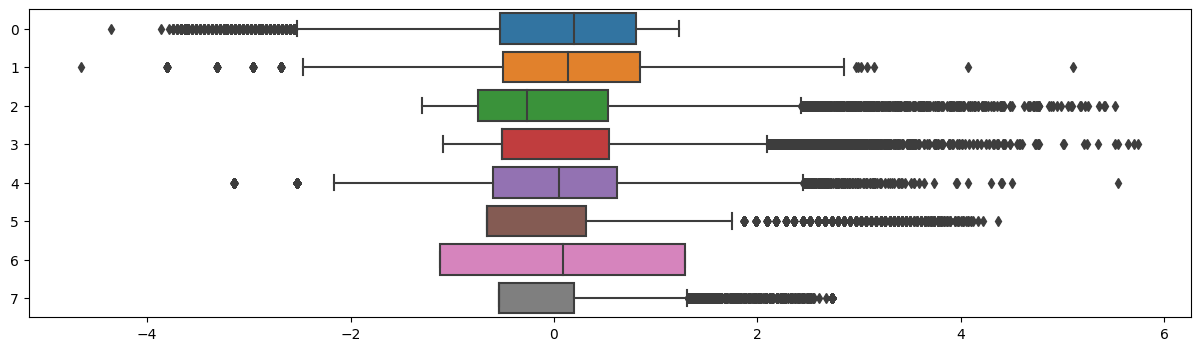

<Axes: >

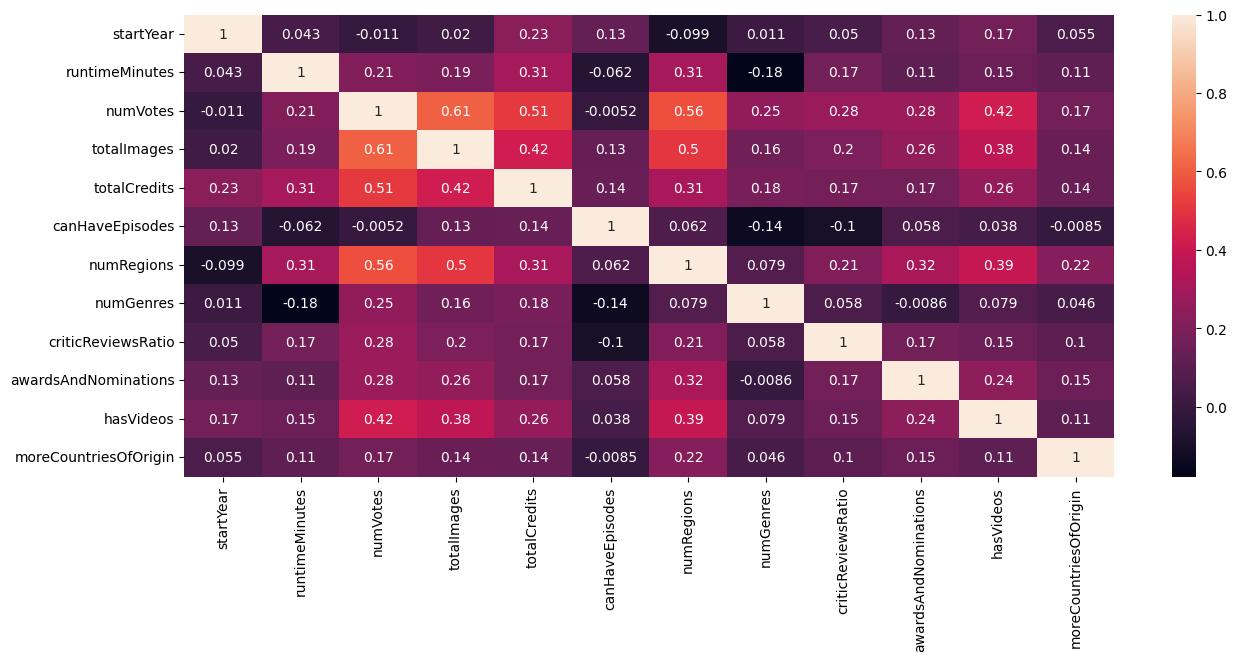

In [7]:
plt.figure(figsize = (15,4))
sns.boxplot(data = train_data, orient = "h")
plt.show()

plt.figure(figsize = (15,6))
sns.heatmap(train_drop.corr(), annot=True)

## Parameter tuning

In [8]:
%%time

sse_list = []
sil_list = []

max_k = 400
for k in range(2, max_k+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=3000)
    kmeans.fit(train_data)

    # SSE (Sum of Squared Errors)
    sse = kmeans.inertia_
    sse_list.append(sse)

    # Silhouette Score
    sil = metrics.silhouette_score(train_data, kmeans.labels_)
    sil_list.append(sil)

CPU times: user 2h 16min 54s, sys: 20min 28s, total: 2h 37min 23s
Wall time: 30min 47s


"_" attributo o metodo calcolato e non una variabile direttamente impostata dall'utente

È una convenzione per indicare che questi attributi sono specifici del modello e non devono essere modificati direttamente dall'utente.

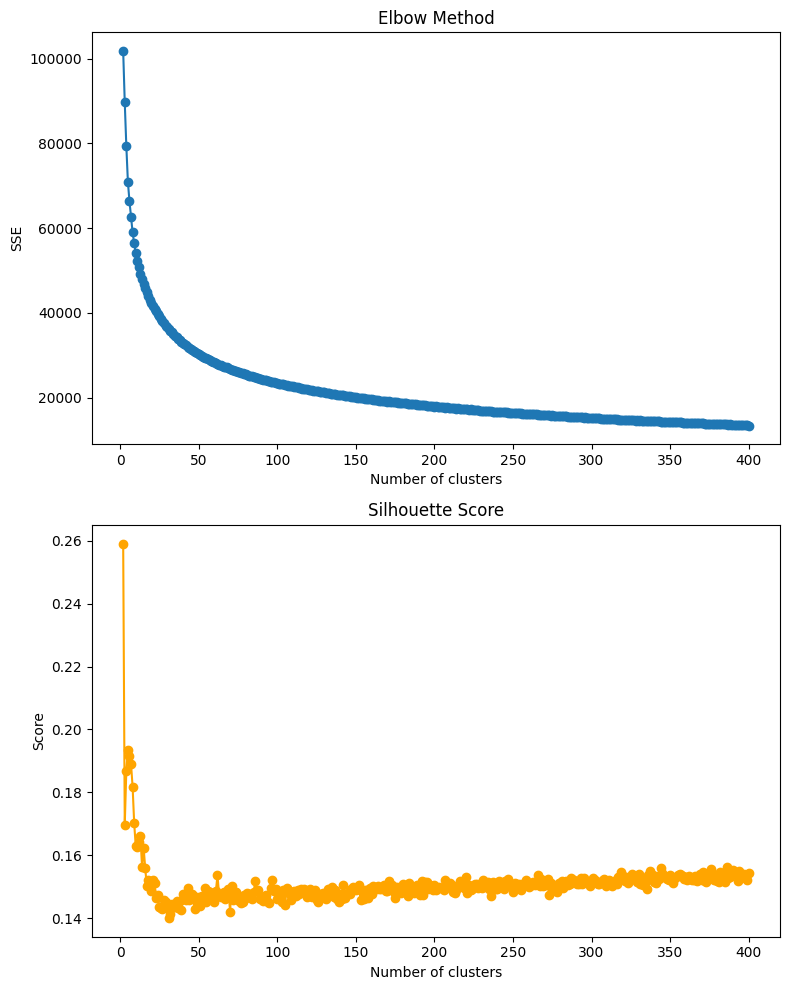

In [9]:
# Visualizzazione dei risultati
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
axs[0].plot(range(2, len(sse_list)+2), sse_list, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('SSE')

axs[1].plot(range(2, len(sse_list)+2), sil_list, marker='o', color='orange')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [10]:
from kneed import KneeLocator
kl = KneeLocator(
    range(2, len(sse_list)+2), sse_list, curve="convex", direction="decreasing"
)
print("Number of cluster: ", kl.elbow)


Number of cluster:  56


(0.0, 50.0)

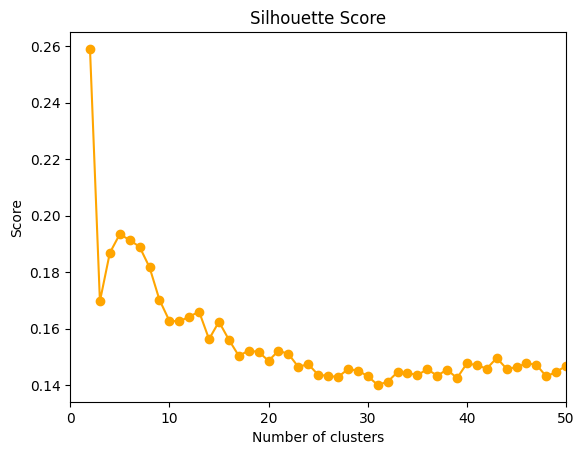

In [16]:
plt.plot(range(2, len(sse_list)+2), sil_list, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.xlim((0, 50))

Se prendiamo in considerazione anche il silhouette score, oltre all'andamento dell'SSE, probabilmente il miglior valore per k è 7 oppure 13.

In [17]:
k = 7

## Clustering results

In [18]:
kmeans=KMeans(init='k-means++', n_clusters=k, n_init=20, max_iter=1000, random_state=123)
kmeans.fit(train_data)

KMeans(max_iter=1000, n_clusters=7, n_init=20, random_state=123)

In [19]:
sse = kmeans.inertia_

print('labels', np.unique(kmeans.labels_, return_counts=True))
print('sse', sse)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels (array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([1997, 1960,  948, 1823, 1420, 4857, 3426]))
sse 62579.40738330141
silhouette 0.18891802169454336


In [20]:
# Creare un DataFrame per i centroidi
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_columns)

# Mostrare la tabella
print(centroids_df)

   startYear  runtimeMinutes  numVotes  totalImages  totalCredits  numRegions  \
0   0.510290       -1.440961 -0.696276    -0.409858     -0.915191   -0.480023   
1  -0.692605        0.644946  0.327732     0.608210      0.321534    0.754685   
2  -2.168796       -1.531823 -0.224615    -0.471570     -1.422225   -0.254502   
3   0.349150        0.290422  0.124067     0.020024      0.212615   -0.068810   
4   0.082576        0.649098  2.048541     1.886278      1.187119    2.141543   
5   0.173559        0.360113 -0.559339    -0.499127     -0.256133   -0.379405   
6   0.232318       -0.039025  0.159672    -0.062088      0.501760   -0.393258   

   numGenres  criticReviewsRatio  
0   0.308615           -0.489240  
1  -0.454036           -0.075729  
2   0.178852           -0.315022  
3  -0.037976            2.350094  
4   0.606483            0.542599  
5  -0.860941           -0.493695  
6   1.020417           -0.359277  


In [21]:
train_clean['kmeans_cluster'] = kmeans.labels_
train_clean['kmeans_cluster'].value_counts()

kmeans_cluster
5    4857
6    3426
0    1997
1    1960
3    1823
4    1420
2     948
Name: count, dtype: int64

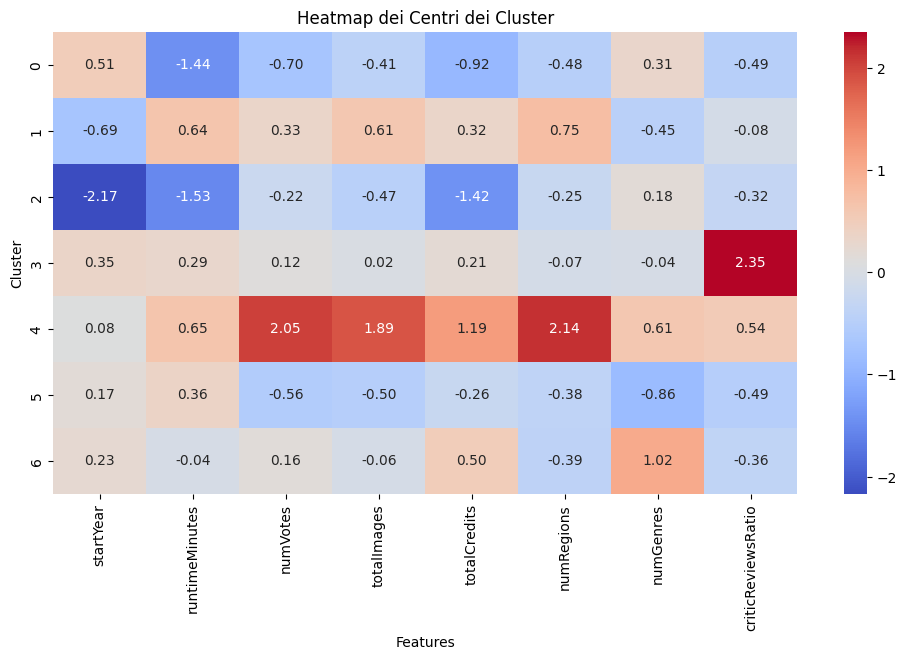

In [22]:

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap dei Centri dei Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

<Axes: xlabel='titleType', ylabel='kmeans_cluster'>

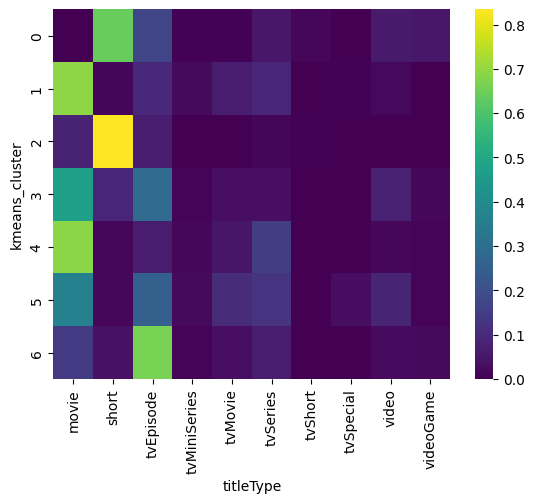

In [23]:
sns.heatmap(pd.crosstab(train_clean['kmeans_cluster'], train_clean['titleType'],
                        normalize='index'),
                        cmap='viridis'
                        )

Con queste due visualizzazioni possiamo farci un'idea della composizione del dataset (nota che l'algoritmo di clustering sta usando solo le features numeriche, ma riesce a estrarre dei cluster che sono abbastanza puri rispetto a `titleType`).

Il cluster 1 contiene film non recenti abbastanza popolari, mentre il cluster 4 contiene film più recenti e più popolari.
Il cluster 0 individua un gruppo piuttosto omogeneo di corti poco recenti, il cluster 6 si compne per lo più di episodi di serie TV, il cluster 3 contiene titoli prevalentemente recensiti da critici.

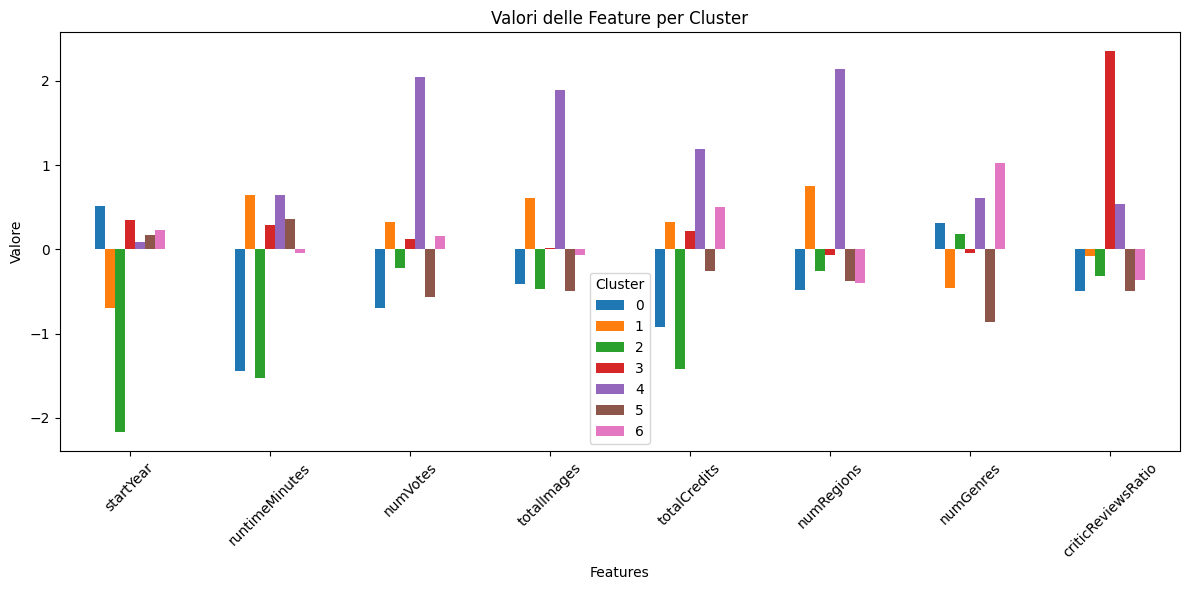

In [24]:

# Plot per una singola feature
centroids_df.T.plot(kind='bar', figsize=(12, 6))
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
plt.title("Valori delle Feature per Cluster")
plt.xlabel("Features")
plt.ylabel("Valore")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

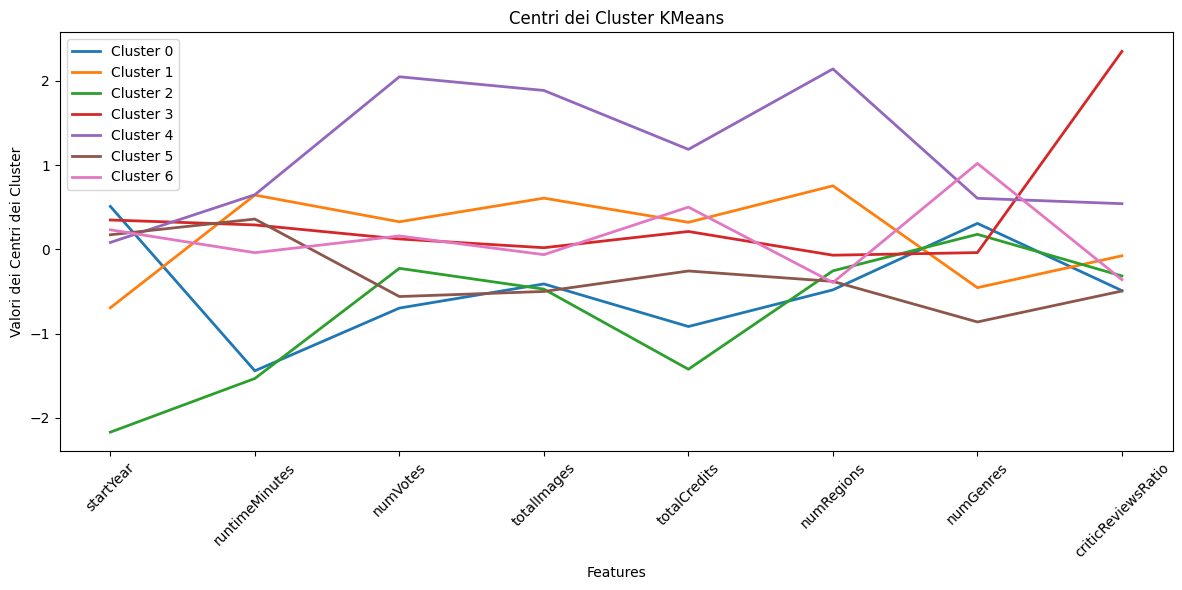

In [25]:
plt.figure(figsize=(12, 6))

# Assicurati che stai iterando sulle dimensioni corrette
for i in range(len(kmeans.cluster_centers_)):
    # Genera l'asse x in base al numero di colonne/features
    x = range(kmeans.cluster_centers_.shape[1])  # Numero delle feature nei centri dei cluster
    y = kmeans.cluster_centers_[i]  # Centri di cluster (y)

    # Tracciare i dati correttamente
    plt.plot(x, y, label=f'Cluster {i}', linewidth=2)

# Aggiunge etichette all'asse x usando il nome delle feature
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)

# Mostra la legenda e il grafico
plt.legend()
plt.xlabel("Features")
plt.ylabel("Valori dei Centri dei Cluster")
plt.title("Centri dei Cluster KMeans")
plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
plt.show()

In [26]:
print(kmeans.cluster_centers_.shape)

(7, 8)


## Visualization (TSNE)

In [27]:
from sklearn.manifold import TSNE

In [28]:
reduced_df = pd.DataFrame(TSNE(n_components=2).fit_transform(train_data))

<Axes: xlabel='0', ylabel='1'>

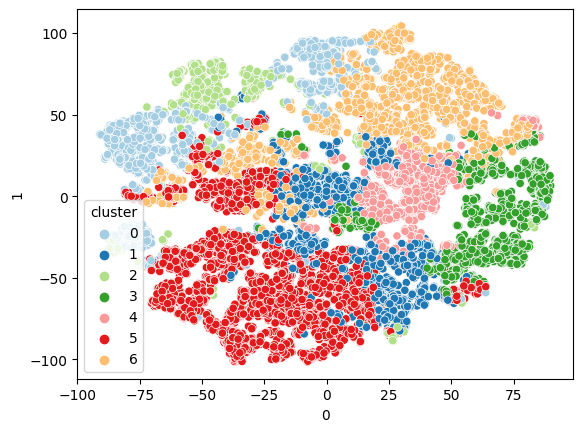

In [29]:
reduced_df['cluster'] = kmeans.labels_
sns.scatterplot(reduced_df, x=0, y=1, hue='cluster', palette="Paired")

## Statistical evaluation

Confrontiamo SSE del clustering sul dataset contro clustering su dati casuali.
Il codice che abbiamo visto a lezione estrae i valori  per ogni colonna del dataset da una distribuzione uniforme compresa tra il valore massimo e il valore minimo osservati per quella colonna.
Per operare un confronto con un dataset più realistico, estraiamo i valori da una distribuzione normale.
Questo è anche particolarmente conveniente, visto che i dati originali sono stati normalizzati con un StandardScaler, per cui ogni colonna ha media=0 e std=1.

L'SSE ottenuto per il clustering sul vero dataset è molto più basso, a conferma che il nostro dataset contiene di fatto una qualche struttura che è catturata dal clustering.

In [30]:
N = 600
sse_stats = []

rows, cols = train_data.shape

for i in range(N):
    Xi = np.zeros(shape=(rows, cols))

    for col in range(cols):
        # Data is normalized so every column has mean=0 and std=1
        Xi[:, col] = np.random.normal(size=(1, rows))

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=1000, random_state=42)
    kmeans.fit(Xi)
    sse_stats.append(kmeans.inertia_)

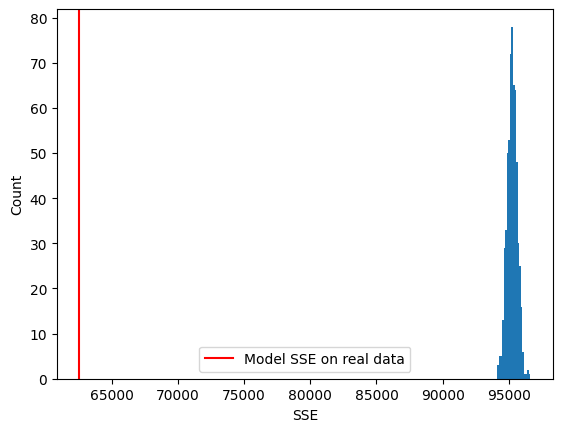

In [31]:
plt.hist(sse_stats, bins='auto')
plt.axvline(x=sse, color='red', label="Model SSE on real data")
plt.xlabel('SSE')
plt.ylabel('Count')
plt.legend()
plt.show()